In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
df = pd.read_csv('Downloads/UpdatedResumeDataSet.csv')

In [18]:
df.shape


(962, 2)

In [20]:
df.tail()

,Category,Resume
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...


In [22]:
df['Category']

0      Data Science
1      Data Science
2      Data Science
3      Data Science
4      Data Science
           ...     
957         Testing
958         Testing
959         Testing
960         Testing
961         Testing
Name: Category, Length: 962, dtype: object

In [24]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

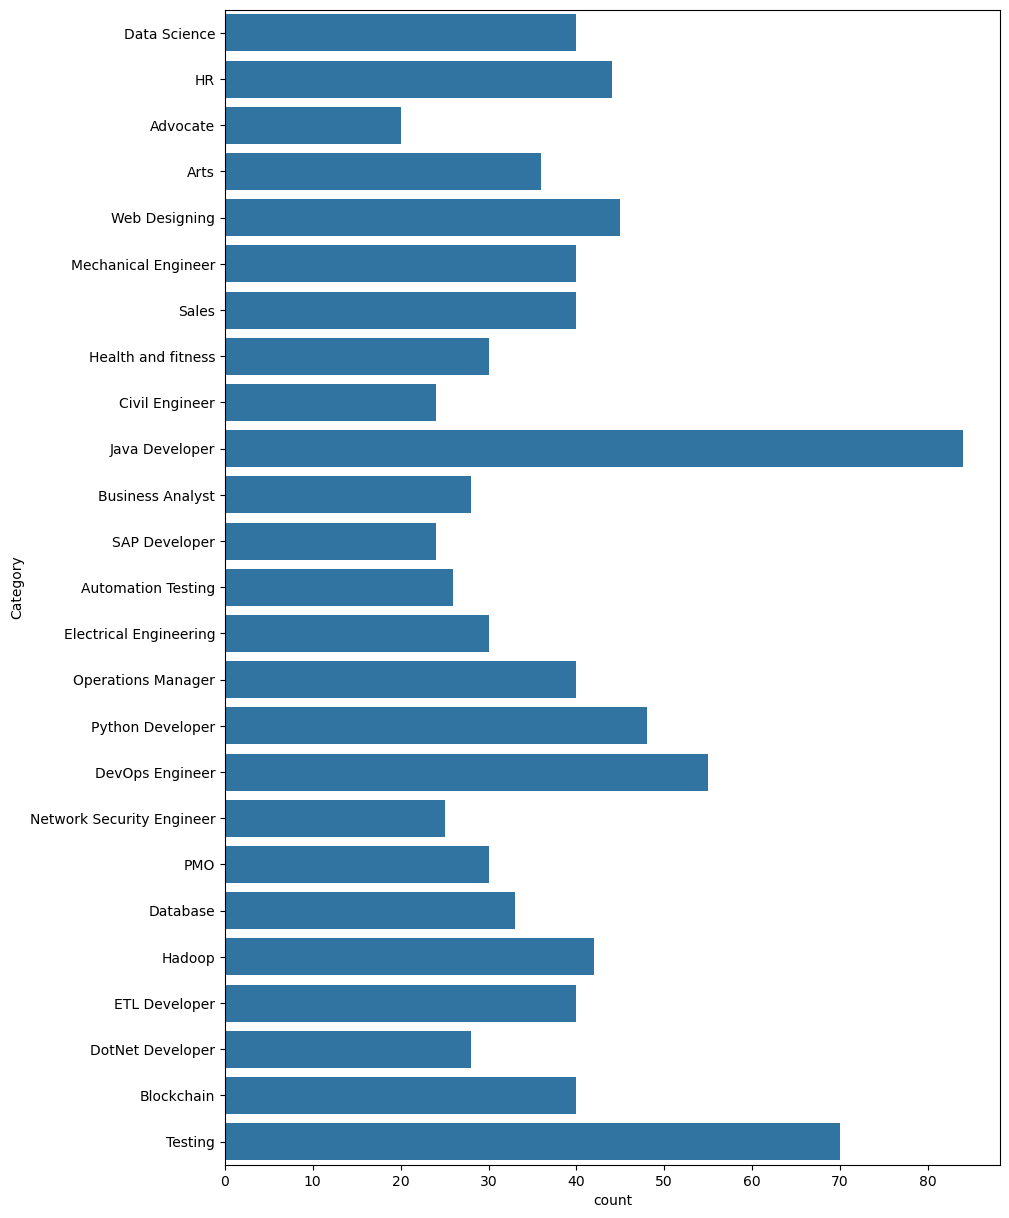

In [40]:
plt.figure(figsize=(10,15))
sns.countplot(df['Category'])
plt.xticks(rotation=0)
plt.show()

([<matplotlib.patches.Wedge at 0x1dcab47e870>,
 [Text(1.058871228953308, 0.29797939609125923, 'Data Science'),
  Text(0.7841417468169058, 0.7714413269322118, 'HR'),
  Text(0.4134731563409379, 1.0193330903024107, 'Advocate'),
  Text(0.053862331076050214, 1.098680503736666, 'Arts'),
  Text(-0.2771758554020645, 1.0645062447830609, 'Web Designing'),
  Text(-0.5706079161115722, 0.9404289479119671, 'Mechanical Engineer'),
  Text(-0.8089120262381768, 0.7454269473310228, 'Sales'),
  Text(-0.9773196261993998, 0.5048230860860717, 'Health and fitness'),
  Text(-1.0745482070561094, 0.23525762625789806, 'Civil Engineer'),
  Text(-1.0988505454600117, -0.05027403646252011, 'Java Developer'),
  Text(-1.0485773173407904, -0.3323937567981556, 'Business Analyst'),
  Text(-0.9271404102234844, -0.5919549473825093, 'SAP Developer'),
  Text(-0.7427813690411197, -0.811341998053472, 'Automation Testing'),
  Text(-0.5207132389301881, -0.9689467079271352, 'Electrical Engineering'),
  Text(-0.291057286964679, -1.

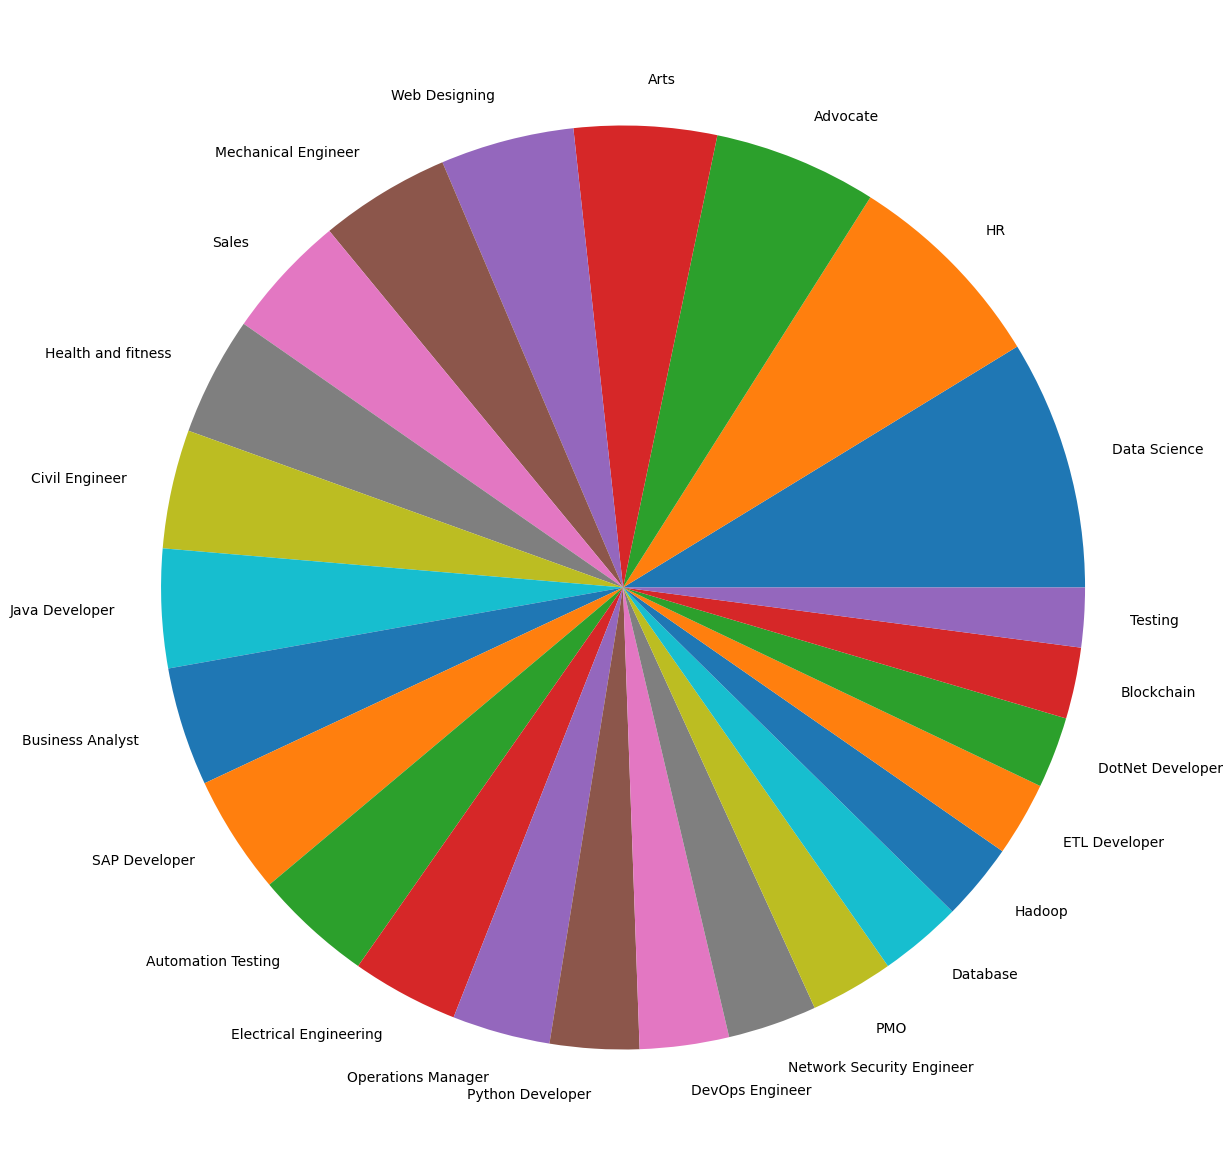

In [42]:
counts = df['Category'].value_counts()
labels= df['Category'].unique()
plt.figure(figsize=(155,15))
plt.pie(counts,labels=labels)


In [44]:
df['Resume'][200]

"Education Details \r\nMay 1999 to September 2002 Diploma Mechanical Engg Mumbai, Maharashtra Institute of Mechanical Engg\r\nMay 1998 to May 1999 Diploma Mechanical Engg. Services  ITES\r\nMay 1993 to May 1995   Mumbai, Maharashtra Industrial Training Institute\r\nSr. Executive-Mechanical Engineering- Automation & Projects Consultant \r\n\r\nSr. Executive-Mechanical Engineering- Automation & Projects Consultant - Mechanical Engineering\r\nSkill Details \r\nMicrosoft Office -Word ,Excel,Auto cad,Micro station J ERP 3d Modeling software- Exprience - 120 monthsCompany Details \r\ncompany - Mechanical Engineering\r\ndescription - Role & Responsibilities: - Application Engineering / Pre Sales & Inside Sales â\x80¢ Provide applications support to inside sales personnel and outside sales channels, Provide product selection and materials of construction technical recommendations.\r\nâ\x80¢ Participate in the necessary training activities to establish technical competency & also Participate in

In [46]:
# Cleaning Data:
# urls, hashtags, mentions, special letters, punctuation

In [48]:
import re

def cleanResume(txt):
    cleanTxt = re.sub(r'http\S+\s', ' ', txt)
    cleanTxt = re.sub(r'RT|cc', ' ', cleanTxt)
    cleanTxt = re.sub(r'#\S+', ' ', cleanTxt)
    cleanTxt = re.sub(r'@\S+', ' ', cleanTxt)
    cleanTxt = re.sub(r'[%s]' % re.escape(r"""!"#$%&'()*+,-./:;<=>?@[\]^_'{|}~"""), ' ', cleanTxt)
    cleanTxt = re.sub(r'[^\x00-\x7f]', ' ', cleanTxt)
    cleanTxt = re.sub(r'\s+', ' ', cleanTxt)
    return cleanTxt


In [50]:
df['Resume']= df['Resume'].apply(lambda x: cleanResume(x))

In [51]:
#Words Into Categorical Values

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [55]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [58]:
df

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,23,Computer Skills Proficient in MS office Word B...
958,23,Willingness to a ept the challenges Positive ...
959,23,PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [60]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [62]:
#VACTORIZATION

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf =  TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requiredtxt = tfidf.transform(df['Resume'])



In [65]:
requiredtxt


<962x7351 sparse matrix of type '<class 'numpy.float64'>'
	with 164261 stored elements in Compressed Sparse Row format>

In [66]:
 from sklearn.model_selection import train_test_split 


In [69]:
X_train, X_test, y_train, y_test = train_test_split(requiredtxt,df['Category'],test_size=0.2,random_state=42)

In [71]:
X_train.shape

(769, 7351)

In [74]:
X_test.shape

(193, 7351)

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf= OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print(accuracy_score(y_test,ypred))

0.9844559585492227


In [77]:
ypred

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23, 21, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20, 21,  6,  7, 23])

In [78]:
#PREDICTION SYSYTEM

In [82]:
import pickle 
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))

In [84]:
#SAMPLE RESUME

'''myresume = """ANAISHA PARVATI
 Data Scientist
 ABOUT ME
 Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do
 eiusmod tempor incididunt ut labore et dolore magna aliqua.
 Ut enim ad minim veniam, quis nostrud exercitation ullamco
 laboris nisi ut aliquip ex ea commodo consequat. Duis aute
 irure dolor in reprehenderit in voluptate velit esse cillum dolore
 eu fugiat nulla pariatur. 
WORK EXPERIENCE
 NOW-2024
 AROWWAI INDUSTRIES
 Data Scientist
 EDUCATION
 BORCELLE UNIVERSITY
 Lorem ipsum dolor
 2020 - 2023
 BORCELLE UNIVERSITY
 Lorem ipsum dolor
 2020 - 2023
 BORCELLE UNIVERSITY
 Lorem ipsum dolor
 2020 - 2023
 Lorem ipsum dolor sit amet, consectetur
 adipiscing elit, sed do eiusmod tempor
 incididunt ut labore et dolore magna aliqua.
 Ut enim ad minim veniam.
 2023-2022
 2021-2020
 SKILLS
 Data Analysis
 DBMS
 Techniques
 Development
 GINYARD INTERNATIONAL CO.
 Data Scientist
 Lorem ipsum dolor sit amet, consectetur
 adipiscing elit, sed do eiusmod tempor
 incididunt ut labore et dolore magna aliqua.
 Ut enim ad minim veniam.
 INGOUDE COMPANY
 Data Scientist
 Lorem ipsum dolor sit amet, consectetur
 adipiscing elit, sed do eiusmod tempor
 incididunt ut labore et dolore magna aliqua.
 Ut enim ad minim veniam.
 EXPERTISE
 Strategic Planning
 Communication
 Data Analysis
 Digital Marketing
 LANGUAGES
 Hindi
 English
 Lorem ipsum 
REFERENCE
 Greta Mae Evans
 Borcelle University
 +123-456-7890
 www.reallygreatsite.com
 Juliana Silva
 Borcelle University
 +123-456-7890
 www.reallygreatsite.com
 CONTACT
 +123-456-7890
 123 Anywhere St., Any City
 www.reallygreatsite.com
 hello@reallygreatsite.com"""'''

'myresume = """ANAISHA PARVATI\n Data Scientist\n ABOUT ME\n Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do\n eiusmod tempor incididunt ut labore et dolore magna aliqua.\n Ut enim ad minim veniam, quis nostrud exercitation ullamco\n laboris nisi ut aliquip ex ea commodo consequat. Duis aute\n irure dolor in reprehenderit in voluptate velit esse cillum dolore\n eu fugiat nulla pariatur. \nWORK EXPERIENCE\n NOW-2024\n AROWWAI INDUSTRIES\n Data Scientist\n EDUCATION\n BORCELLE UNIVERSITY\n Lorem ipsum dolor\n 2020 - 2023\n BORCELLE UNIVERSITY\n Lorem ipsum dolor\n 2020 - 2023\n BORCELLE UNIVERSITY\n Lorem ipsum dolor\n 2020 - 2023\n Lorem ipsum dolor sit amet, consectetur\n adipiscing elit, sed do eiusmod tempor\n incididunt ut labore et dolore magna aliqua.\n Ut enim ad minim veniam.\n 2023-2022\n 2021-2020\n SKILLS\n Data Analysis\n DBMS\n Techniques\n Development\n GINYARD INTERNATIONAL CO.\n Data Scientist\n Lorem ipsum dolor sit amet, consectetur\n adipiscing elit, s

In [86]:
import pickle

clf = pickle.load(open('clf.pkl','rb'))
myresume = input("Enter your resume text here: \n ")
cleaned_resume = cleanResume(myresume)
input_features = tfidf.transform([cleaned_resume])

prediction_id = clf.predict(input_features)[0]

category_mapping = {
    15:"Java Developer",
    23:"Testing",
    8:"DevOPs Engineer",
    20:"Python Developer",
    24:"Web Designing",
    12:"HR",
    13:"Hadoop",
    3:"Blockchain",
    10:"ETL Developer",
    18:"Operations Manager",
    6:"Data Science",
    22:"Sales",
    16:"Mechanical Engineer",
    1:"Arts",
    7:"Database",
    11:"Electrical Engineering",
    14:"Health and fitness",
    19:"PMO",
    4:"Business Analyst",
    9:"DotNet Developer",
    2:"Automation Testing",
    17:"Network Security Engineer",
    21:"SAP Developer",
    5:"Civil Engineer",
    0:"Advocate",
}

category_name = category_mapping.get(prediction_id,"Unknown")
print()
print("Predicted Category :", category_name)
print(prediction_id)  #predcition ID
    

Enter your resume text here: 
  ANAISHA PARVATI  Data Scientist  ABOUT ME  Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do  eiusmod tempor incididunt ut labore et dolore magna aliqua.  Ut enim ad minim veniam, quis nostrud exercitation ullamco  laboris nisi ut aliquip ex ea commodo consequat. Duis aute  irure dolor in reprehenderit in voluptate velit esse cillum dolore  eu fugiat nulla pariatur.  WORK EXPERIENCE  NOW-2024  AROWWAI INDUSTRIES  Data Scientist  EDUCATION  BORCELLE UNIVERSITY  Lorem ipsum dolor  2020 - 2023  BORCELLE UNIVERSITY  Lorem ipsum dolor  2020 - 2023  BORCELLE UNIVERSITY  Lorem ipsum dolor  2020 - 2023  Lorem ipsum dolor sit amet, consectetur  adipiscing elit, sed do eiusmod tempor  incididunt ut labore et dolore magna aliqua.  Ut enim ad minim veniam.  2023-2022  2021-2020  SKILLS  Data Analysis  DBMS  Techniques  Development  GINYARD INTERNATIONAL CO.  Data Scientist  Lorem ipsum dolor sit amet, consectetur  adipiscing elit, sed do eiusmod tempor


Predicted Category : Data Science
6
